In this example we want to interpolate a 2D given function such as 
$$f(x,y)=e^{-|x+y|}(\sin(4\pi x)+\cos(2\pi(y-1/4)))$$
below we see a plot of the function.

In [1]:
import numpy as np
def f(x):
    y = x[:,1]
    x = x[:,0]
    return np.exp(-1*np.abs(x+y))*(np.sin(x*np.pi*4)+np.cos(y*np.pi*2-np.pi/2))

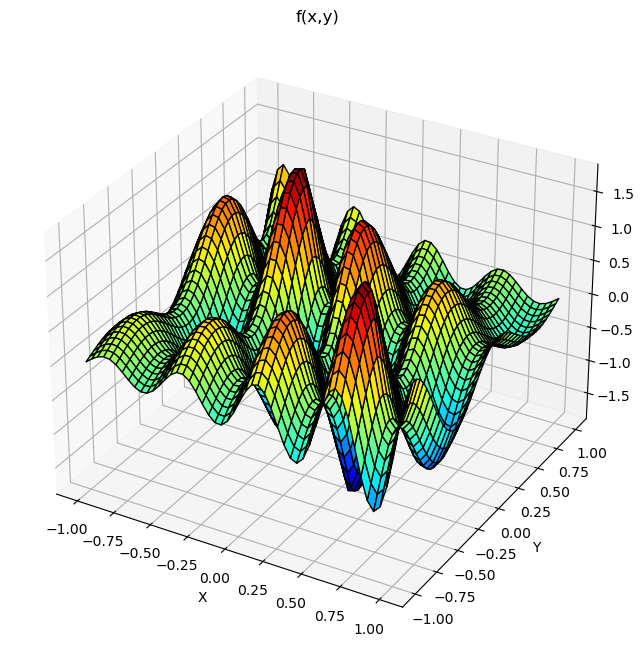

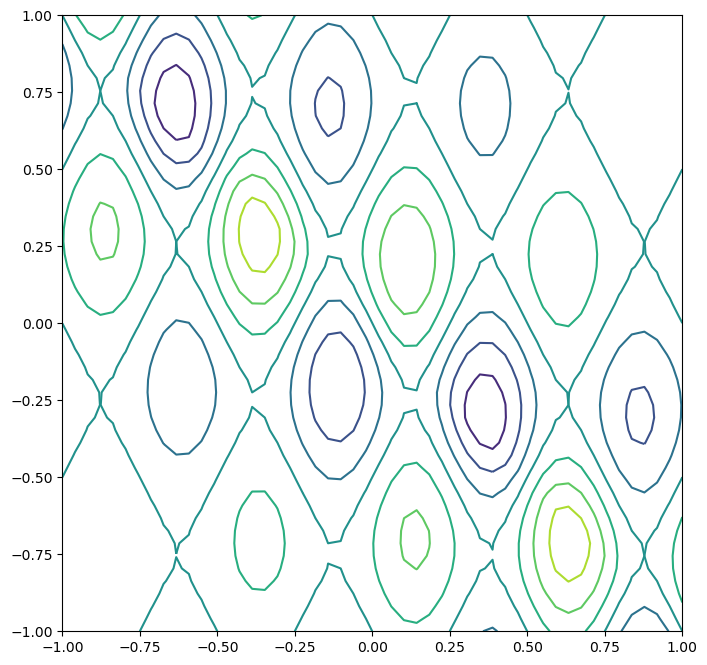

In [2]:
from utils.plot import plot_func_2d
plot_func_2d(50,f)

First we use the Chebychev interpolation to check, if the interpolation of functions work correctly:

k 12 grid_error: 4.470064236599028e-15 uniform grid_error: 0.8684623384683037
k 20 grid_error: 3.83026943495679e-15 uniform grid_error: 0.04163760761719576


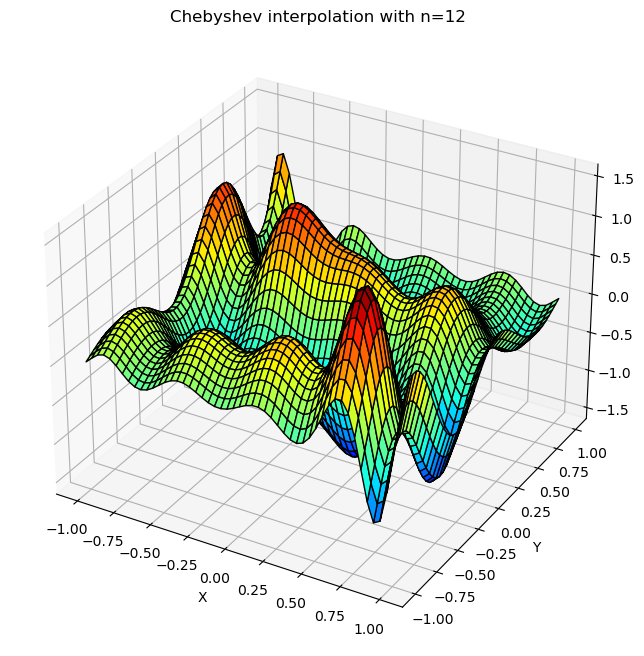

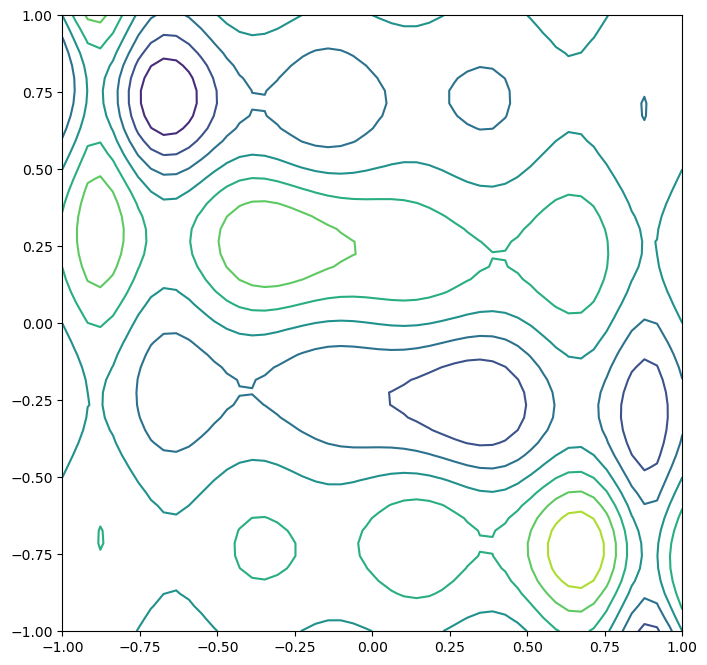

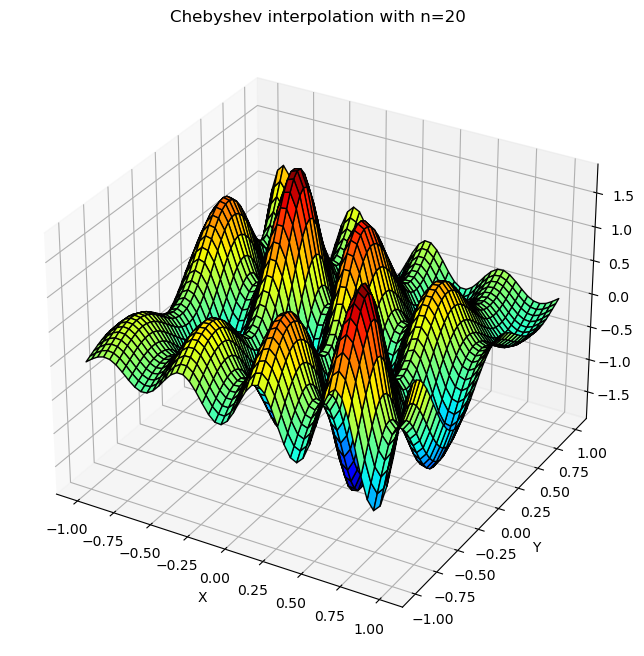

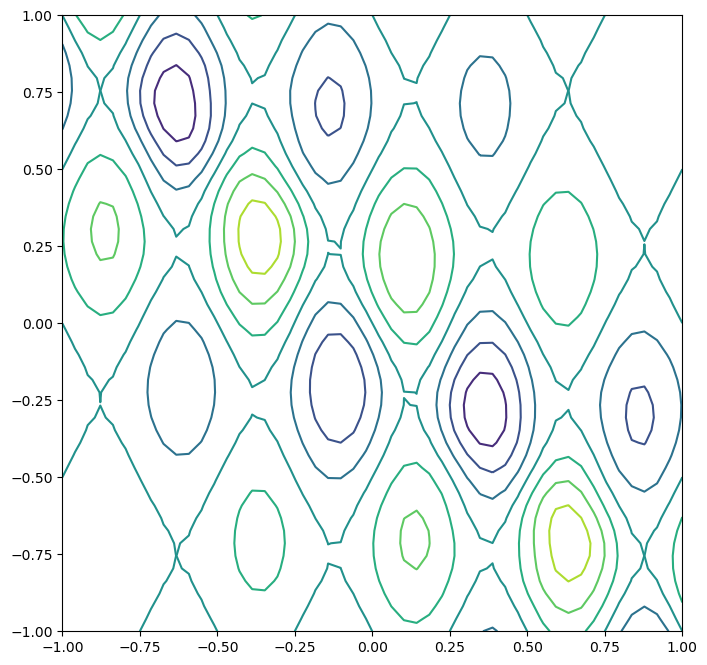

In [3]:
from utils.chebyshev import Chebyshev
from utils.plot import plot_interp_2d
for k in [12,20]:
    cheb = Chebyshev(f,k,2)
    grid, coefs = cheb.coefficients()
    x = cheb._cos_grid()
    yc = cheb.interpolate(x,coefs)
    l = 10
    xxx = np.linspace(-1.0,1.0,l)
    X,Y = np.meshgrid(xxx,xxx)
    points = np.array([X.reshape(l*l,),Y.reshape(l*l,)]).T
    yx = cheb.interpolate(points,coefs)
    print(f'k {k} grid_error: {np.max(np.abs(f(x)-yc))} uniform grid_error: {np.max(np.abs(f(points)-yx))}')
    plot_interp_2d(50,cheb,coefs,title=f"Chebyshev interpolation with n={k}")

We see that this function is difficult to be interpolated. Thus $k>20$ is needed to interpolate with an error $<0.1$. 

In [4]:
from dnn_construction import compute_dnn

nets = []

for n in [12,20]:
    net = compute_dnn(2,f,1e-07,0.5,0.5,n)
    nets.append(net[0])

Iteration: 1 Error: 4.1395457728299334e-08, n: 13, delta: 0.5
Total depth: 141, Total size: 184154, n: 12, delta: 0.5, error: 4.1395457728299334e-08. Reached after 2 iterations.
Iteration: 1 Error: 1.740600627520017e-08, n: 21, delta: 0.5
Total depth: 218, Total size: 495527, n: 20, delta: 0.5, error: 1.740600627520017e-08. Reached after 2 iterations.


k 12 uniform grid_error: 0.8825459775389376
k 20 uniform grid_error: 0.08985452860902643


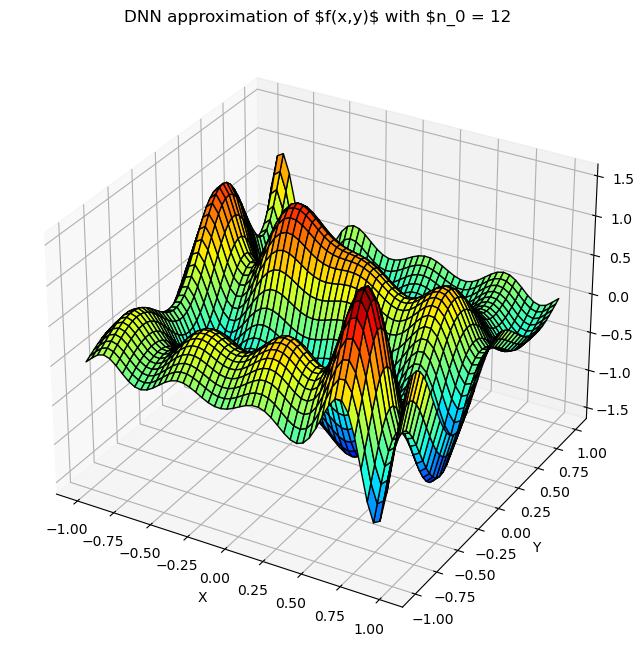

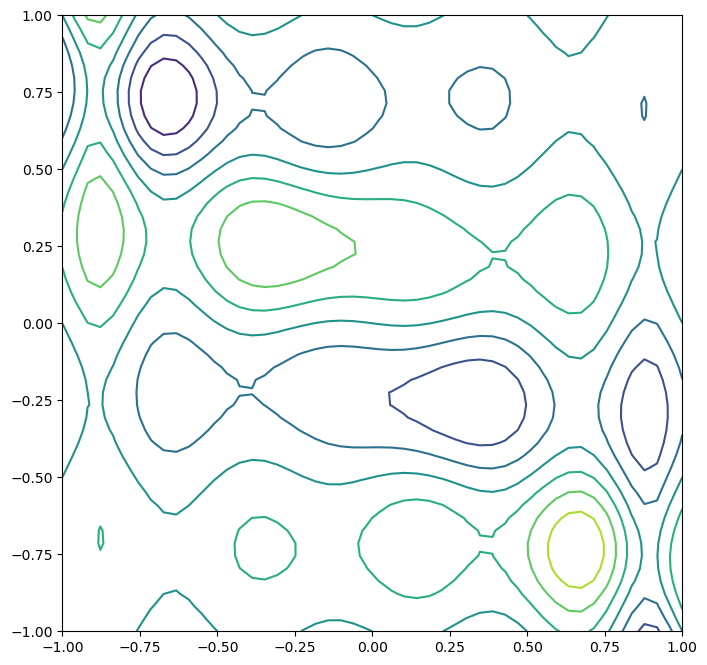

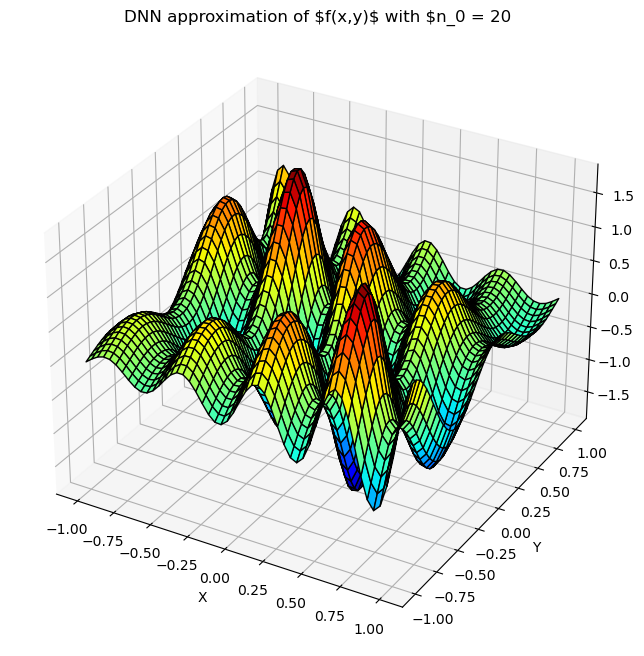

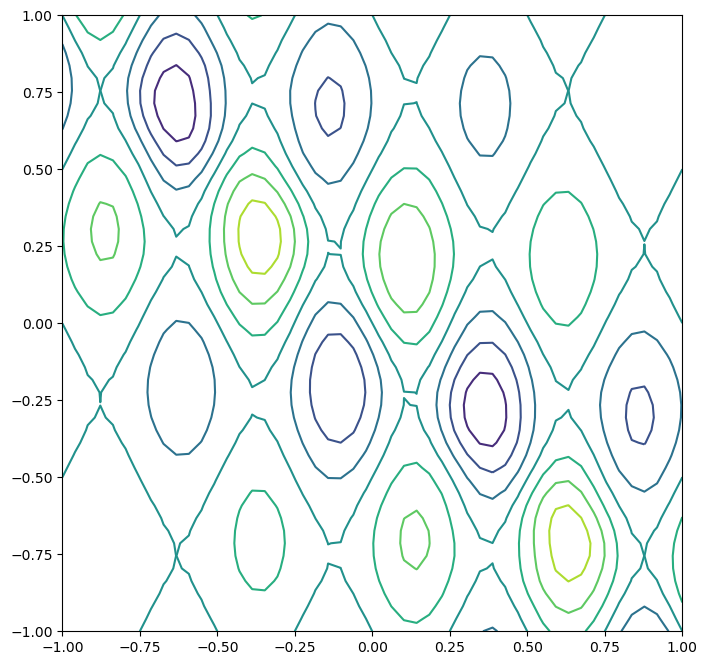

In [5]:
from utils.plot import plot_net_2d

def funct(x):
    return nets[0].realize(x)

for i, k in enumerate([12,20]):
    l = 50
    xxx = np.linspace(-1.0,1.0,l)
    X,Y = np.meshgrid(xxx,xxx)
    points = np.array([X.reshape(l*l,),Y.reshape(l*l,)]).T
    yx = np.array([nets[i].realize(p) for p in points])
    Z = yx
    print(f'k {k} uniform grid_error: {np.max(np.abs(f(points)-yx))}')
    plot_net_2d(l,nets[i], title=f"DNN approximation of $f(x,y)$ with $n_0 = {k}")